In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
from PIL import Image
import numpy as np
import tqdm.auto
import faiss

ImageType = Image.Image

In [3]:
from segmentation.shapes import get_shape_hash

In [10]:
from segmentation.loading import DATA_DIR, images_in_dir
from itertools import islice

x = list(islice(images_in_dir(DATA_DIR / "cutouts2"), 50))
reference_image = Image.open(x[10])

0it [00:00, ?it/s]

0.619140625
0.685546875
0.9033203125


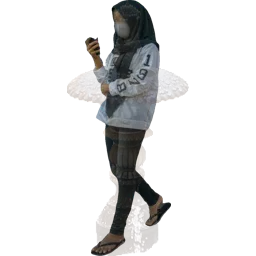

0.9111328125


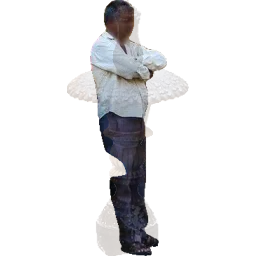

0.9228515625


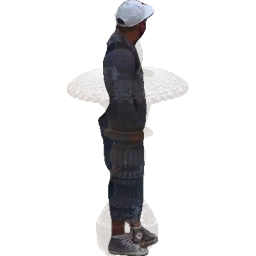

0.923828125


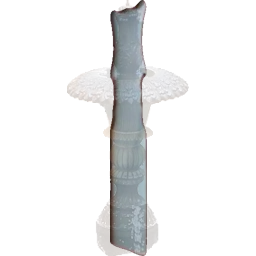

0.92578125


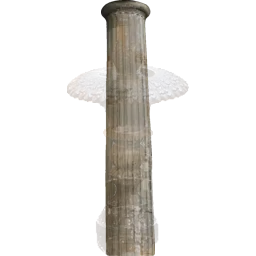

0.9296875


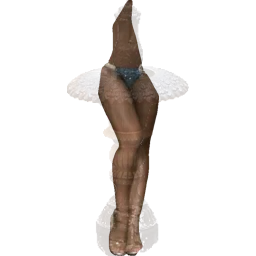

0.931640625


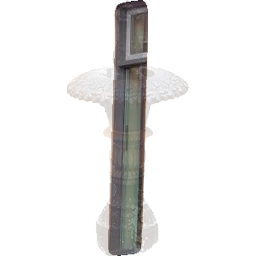

0.9375


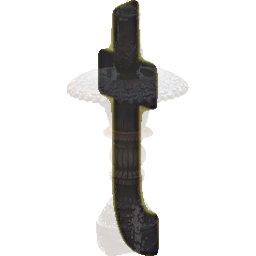

0.9384765625


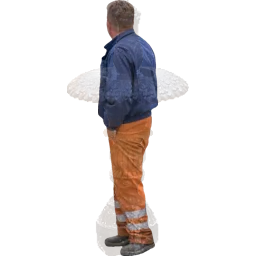

0.9443359375


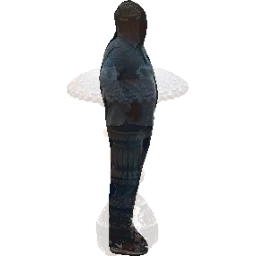

0.953125


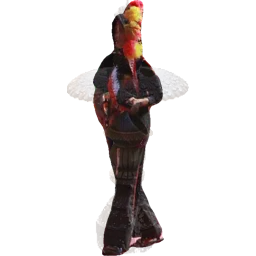

0.9580078125


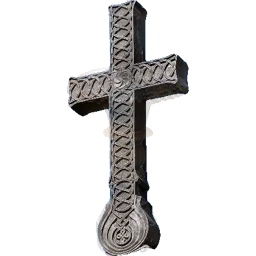

In [97]:
hash_size = 32
h_reference = get_shape_hash(reference_image, size=hash_size)
best_similarity = 0

x = tqdm.auto.tqdm(islice(images_in_dir(DATA_DIR / "cutouts2"), 50, None))
for path in x:
    image = Image.open(path)
    h = get_shape_hash(image, size=hash_size)
    highest_possible_similarity = hash_size * hash_size
    similarity = (
        np.unpackbits(~np.bitwise_xor(h_reference, h)).sum()
        / highest_possible_similarity
    )

    if similarity > best_similarity:
        best_similarity = similarity
        print(similarity)

        image.alpha_composite(reference_image)  # reference_image_semi_transparent
        if similarity > 0.8:
            display(image)

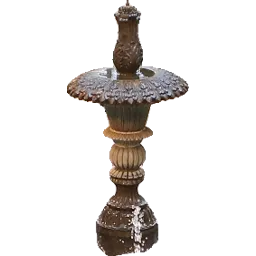

In [75]:
reference_image

In [187]:
from segmentation.loading import iterate_images
from segmentation.shapes import get_shape_hash_float


max_n_images = 10_000_000

hashes = []
for image in tqdm.auto.tqdm(
    iterate_images(DATA_DIR / "cutouts2", max_n_images=max_n_images), total=max_n_images
):
    # image = Image.open(path)
    h = get_shape_hash_float(image, size=8)
    hashes.append(h)

hashes = np.array(hashes)

  0%|          | 0/10000000 [00:00<?, ?it/s]

In [190]:
# save array to disk
# np.save("hashes.npy", hashes)

In [191]:
size_MB = hashes.size * hashes.itemsize / 1000 / 1000

In [49]:
hashes.shape

(1038097, 64)

In [192]:
size_MB

531.505664

In [4]:
hashes = np.load("hashes.npy")

In [7]:
index = faiss.IndexFlatL2(64)
index.add(hashes)

In [18]:
paths = list(islice(images_in_dir(DATA_DIR / "cutouts2"), 10000000))

In [214]:
most_similar = index.search(hashes[10:11], 4)[1][0]
most_similar

array([    10,  98489, 553343, 972024])

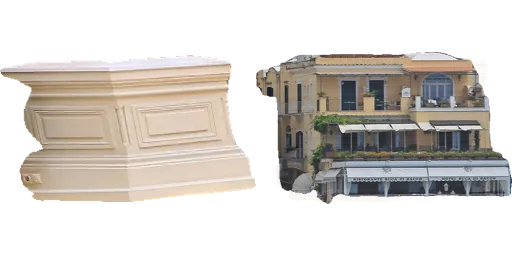

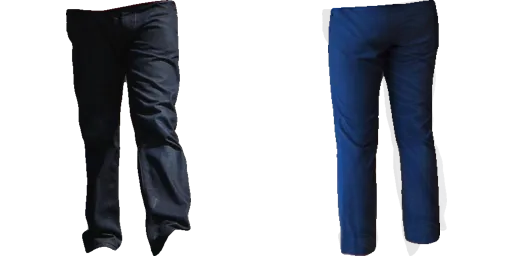

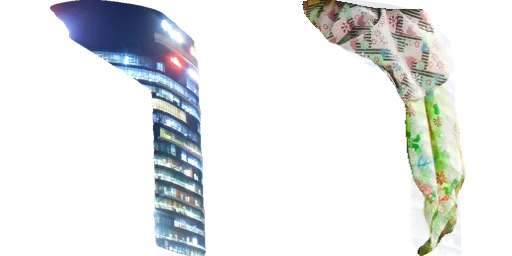

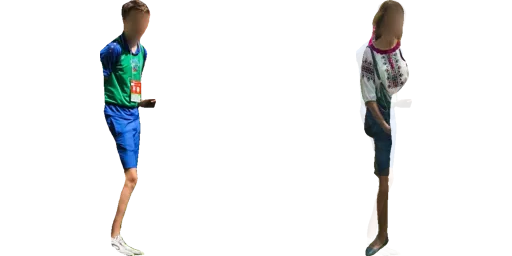

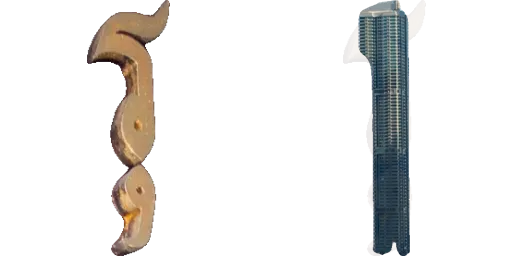

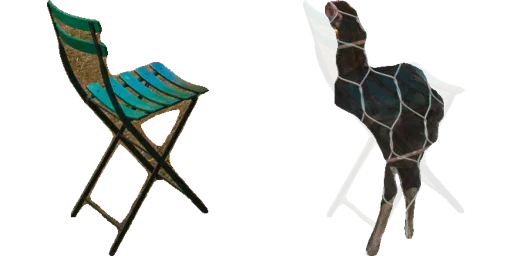

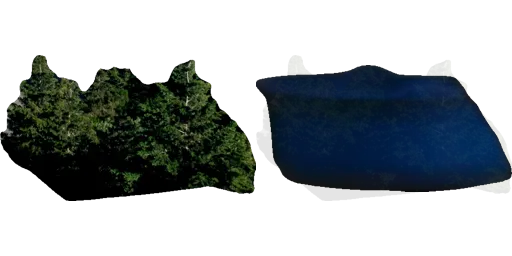

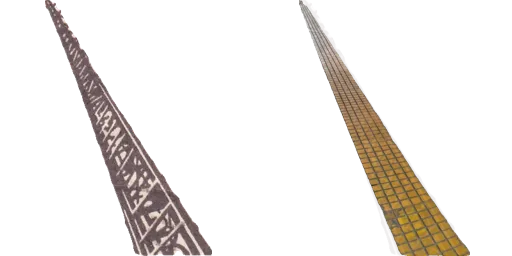

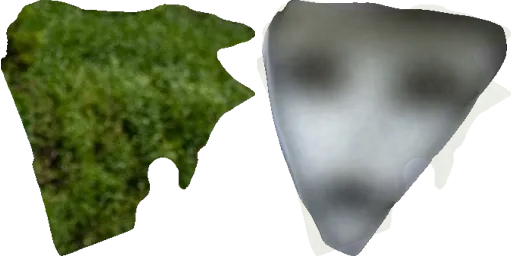

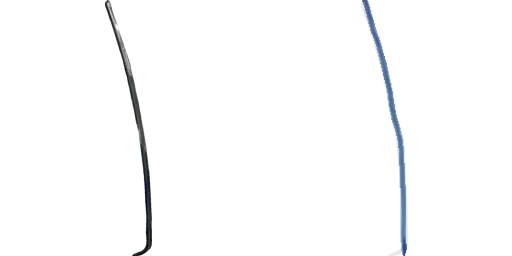

In [50]:
# for i in most_similar[0]:
from segmentation.visualization import show_comparison

for i in range(20, 1000, 100):
    most_similar = index.search(hashes[i : i + 1], 4)[1][0]
    comparison_image = show_comparison(
        Image.open(paths[most_similar[0]]), Image.open(paths[most_similar[1]])
    )
    display(comparison_image)

# show_comparison(
#     Image.open(paths[most_similar[0, 0]]), Image.open(paths[most_similar[0, 1]])
# )
# image = Image.open(paths[i])
# display(image)

In [51]:
len(paths)

1038097

In [53]:
import sys

sys.getsizeof(paths)

8448728

In [35]:
paths[10000]

PosixPath('/Users/vaclav/prog/segmentation/data/cutouts2/sa_000020/00224716_00072.webp')

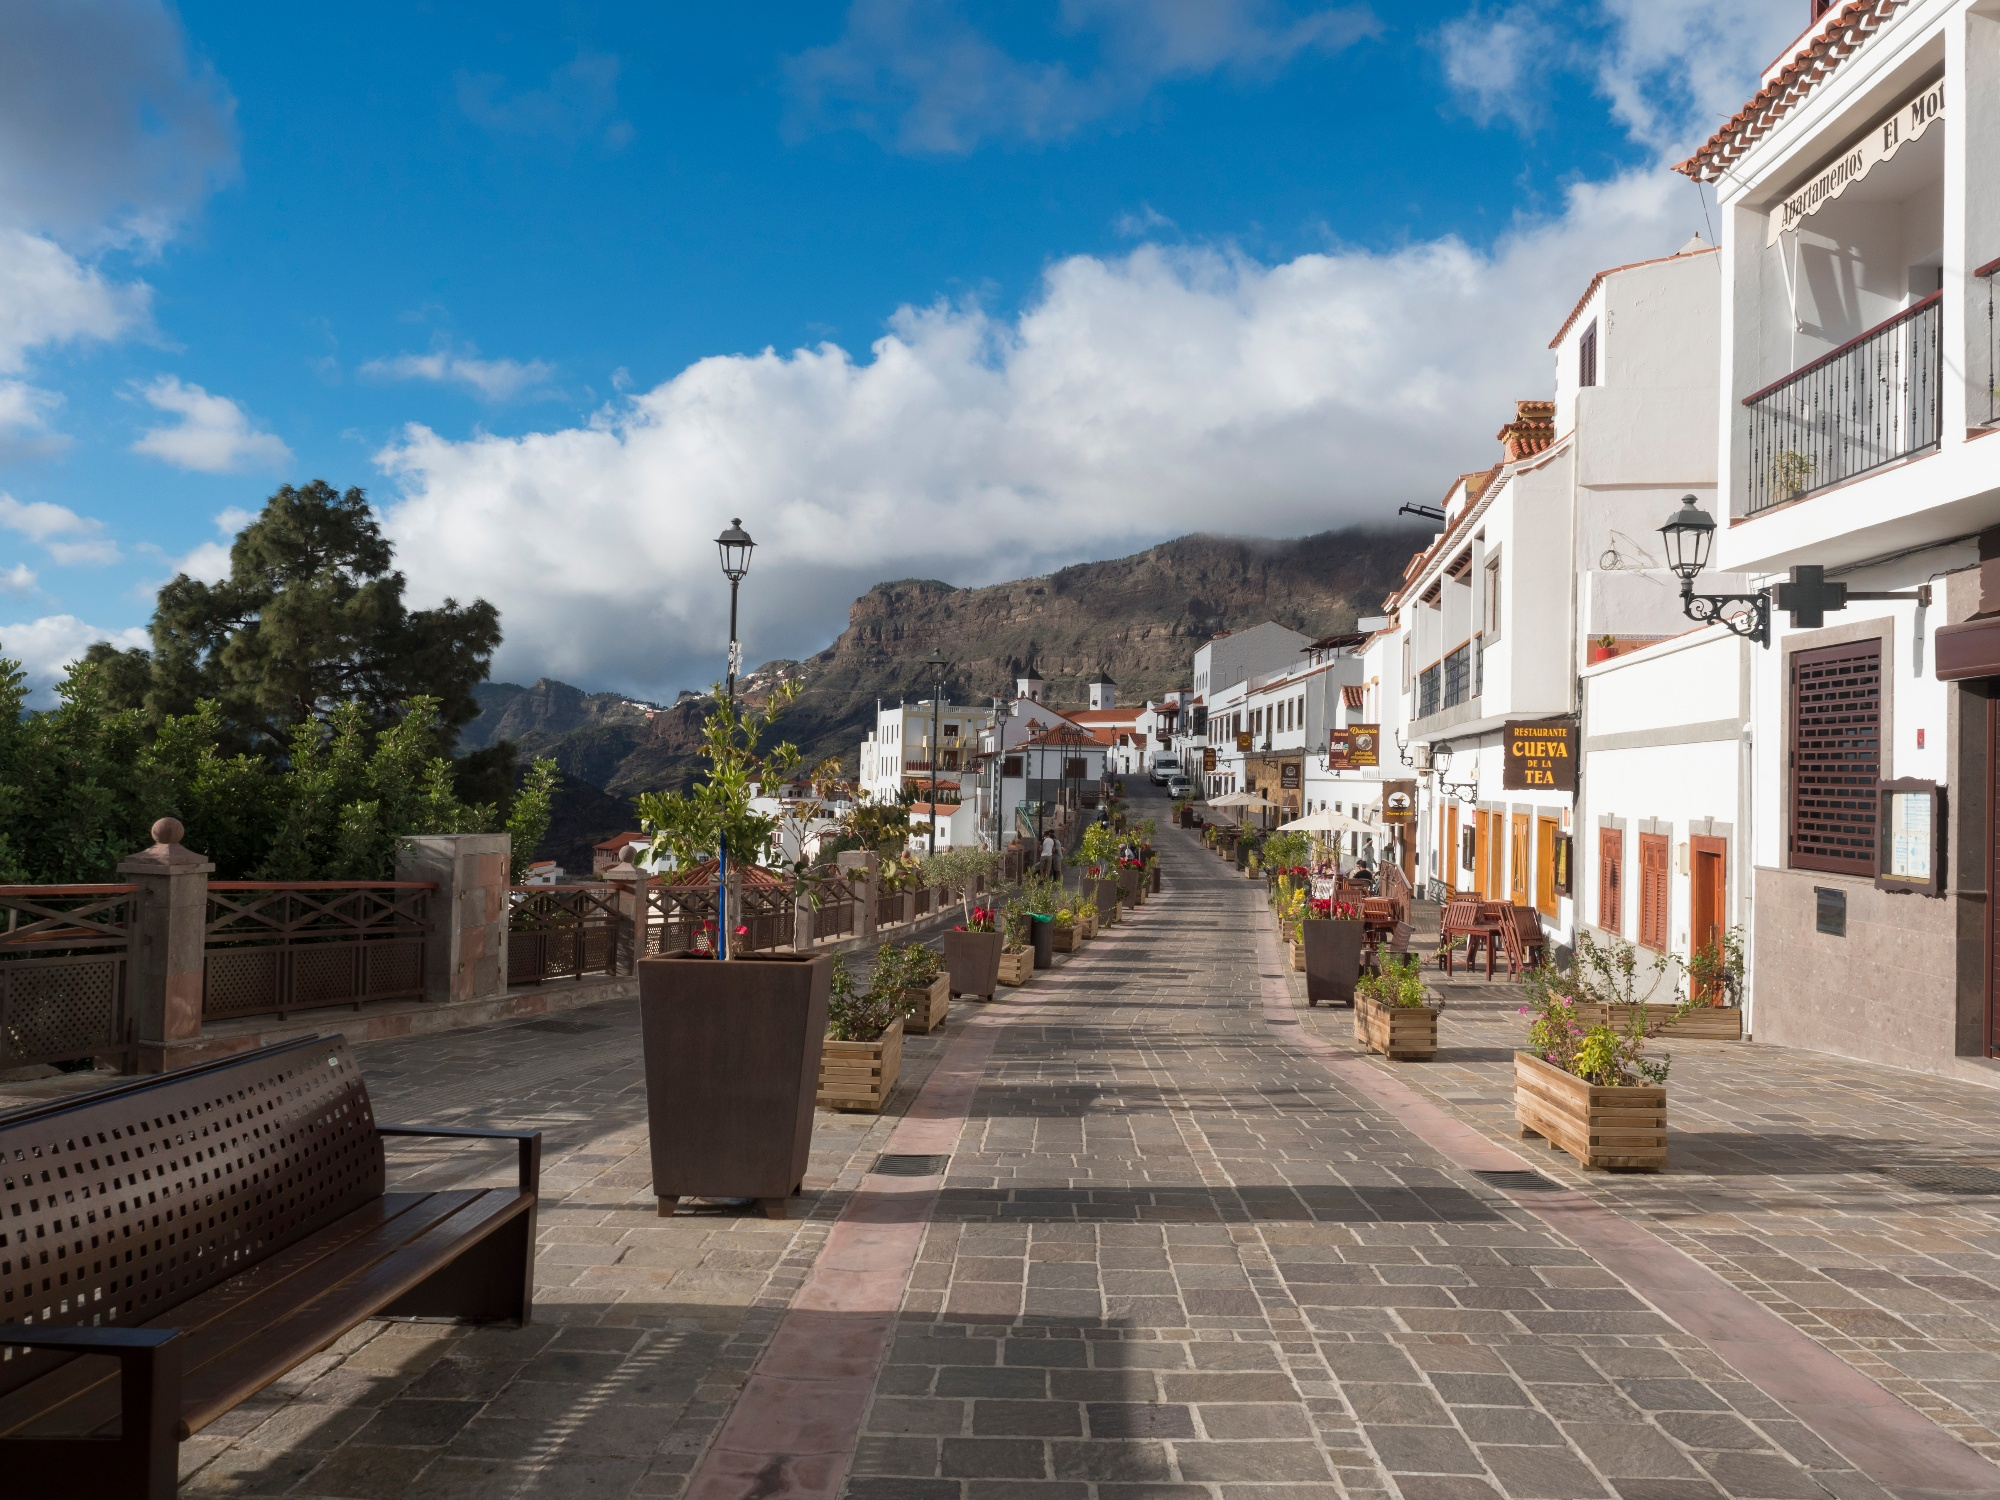

In [44]:
Image.open("./sa_000000/sa_401.jpg")

In [4]:
len(x)

0